In [2]:
from astropy.io import fits,ascii
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from astropy.table import Table
from astropy.coordinates import SkyCoord
from scipy.stats import ks_2samp
from astropy import units as u

In [3]:
homedir = os.getenv("HOME")
sys.path.append(homedir+'/github/APPSS/')
from a100sdss import ks, anderson
sys.path.append(homedir+'/github/LCS/python/Python3/')
from LCScommon import *

Running on coma


In [4]:
plotdir = homedir+'/research/LCS/plots/'


# Compare B/T distribution of core and infall galaxies #

* need to see if BT distribution is similar
* if not, we will need to cut on BT for the simulation
* otherwise we will conflate multiple factors


CONCLUSION
* B/T of core/infall are significantly different. pvalue = 1.6e-10 
* after cutting B/T < 0.3, the difference is much smaller.  pvalue = 0.015

In [ ]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcscore-external-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-BTcut.png'
b.lcs_compare_BT()#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

# Comparison of LCS with GSWLC #

- The GSWLC provides a better comparison sample for us.
- I matched to GSWLC-X2 - used 5 arcsecond radius.  found 1496 matches.
  - I didn't note how I did the match.  I don't see any python programs, so I probably used topcat.
  - redoing on 5/29/20
  - matching LCS_all_size_KE_SFR.fits with GSWLC-X2-LCS-Zoverlap.dat
  - matching NSA RA,DEC with GSWLC RA,DEC
    - 5 arcsec offset
    - best match, symmetric
    - 1 and 2
    - found 1477 pairs (~20 fewer than last time :( )
   - 10 arcsec search radius
     - 1487 pairs
   - 15 arcsec search radius
     - 1490 pairs
- we can use the GSWLC SFRs and Stellar masses for both the LCS and comparison galaxies.  This removes significant uncertainty associated with mixing methods for calculating SFR and Mstar.

- redshift limit $0.01 < z < 0.03$
- mag limit r petrosian $r = 18.0$
- main sequence: $log10(sSFR) > -11$
- explanation of GSWLC-2 catalog http://pages.iu.edu/~salims/gswlc/table2.pdf

**Stellar Mass Limit**

- convert r to Mr at maximum distance of LCS ($z=.0433$)
- then plot Mstar vs Mr, and estimate Mstar limit from Mr limit

**SFR Limit**
- Salim+2018 use $log10(sSFR) > -11$ to select star-forming galaxies
- $log10(sSFR) < -11.5$ should be considered upper limits GSWLC-A (Salim+2018, pg 11, col2)
  - we use this as our sSFR limit
- for SF galaxies, SFR errors are typically below 0.1dex

**Environment Catalogs**
- yang+07
- tempel+2012 - http://www.aai.ee/~elmo/dr8groups/readme.txt
- decarvalha+2017

# SFR - Mstar: no B/T cut #

repeating above three plots, but for SFR vs Mstar

### SFR-M*: LCS core vs GSWLC field, no BT cut ###

* SFRs are VERY different
* stellar masses are different

**need to make a mass-matched sample?**
as a counter point, the difference in stellar mass distributions are due to the 
GSWLC sample having lower mass galaxies. This would increase the fraction of low-SFR galaxies in the GSWLC sample, yet the LCS core galaxies have even lower SFRs. 

number in lcs sample =  163
number in gsw sample =  12117
just checking ... 12103 163
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 7.036e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.30
p-vale = 1.204e-12 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

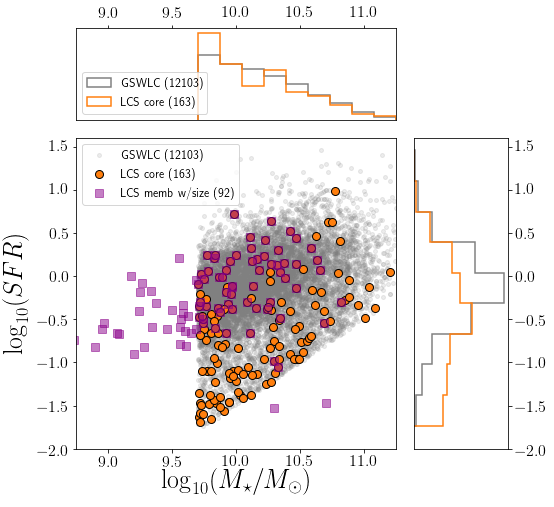

In [7]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False)

### mass-matched sample ###

### LCS Core vs GSWLC, no BT cut, mass matching ###

number in lcs sample =  163
number in gsw sample =  12117
galaxies in slice < # requested 5 20 11.206 0.0266
just checking ... 3259 163
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.05
p-vale = 8.242e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.30
p-vale = 1.604e-12 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

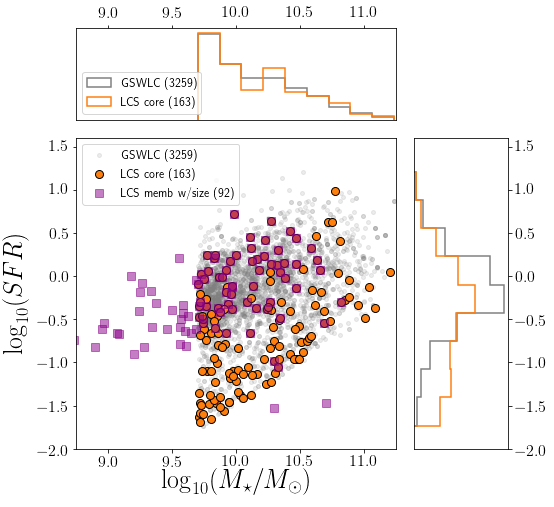

In [25]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True)

In [9]:
sum(b.lcs.cat['sampleflag'] & b.lcs.cat['membflag'])

92

### SFR-M*: LCS infall vs GSWLC, no BT cut ###

* stellar masses are very diff (more low-mass galaxies in gswlc)
* SFRs are not different

**again, need mass-matched sample**

number in lcs sample =  138
number in gsw sample =  12117
just checking ... 12103 137
9.701
9.707
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.07
p-vale = 5.210e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.23
p-vale = 1.810e-06 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

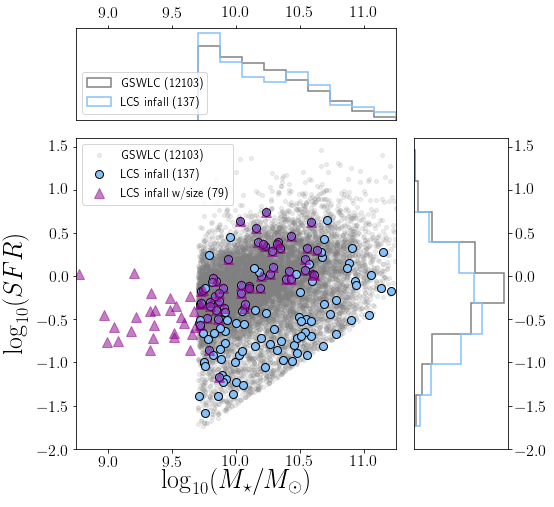

In [10]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=False)

### SFR-M*: LCS infall vs GSWLC, no BT cut, with mass matching ###

number in lcs sample =  138
number in gsw sample =  12117
galaxies in slice < # requested 16 20 10.782 0.0208
galaxies in slice < # requested 2 20 11.21 0.0295
galaxies in slice < # requested 5 20 11.293 0.0332
galaxies in slice < # requested 3 20 11.041 0.021
galaxies in slice < # requested 0 20 10.931 0.0169
	ruh roh - doubling mass and redshift slices
galaxies in slice < # requested 5 20 10.939 0.0219
galaxies in slice < # requested 7 20 10.509 0.0153
just checking ... 2760 137
9.701
9.707
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.04
p-vale = 9.855e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.24
p-vale = 7.399e-07 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

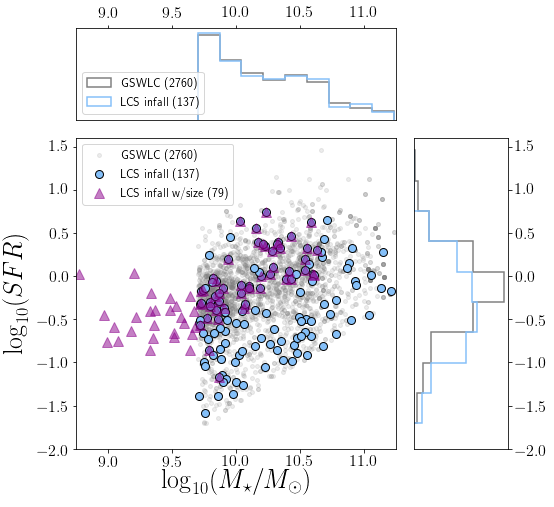

In [26]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=True)

### SFR-M*: LCS core vs infall, no BT cut ###

* stellar masses are not diff 
* SFRs are not different

**again, need mass-matched sample**

number in core sample =  163
number in external sample =  138
just checking ... 163 138
9.702
9.707
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 4.052e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.16
p-vale = 3.660e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

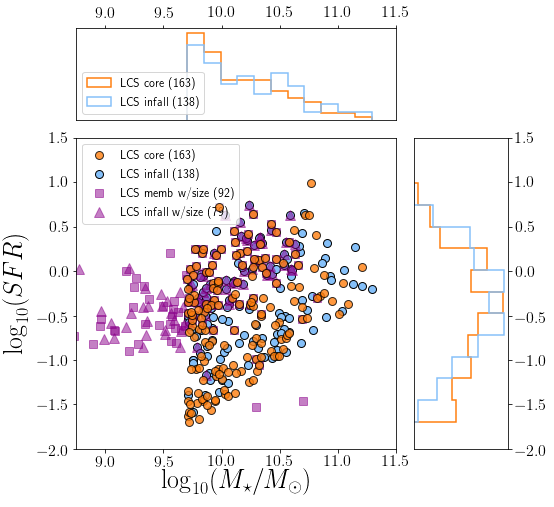

In [12]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=12)

# SFR- Mstar with B/T < 0.3 #

### SFR-M*: LCS infall vs GSWLC, with BT cut ###


* SFRs are not different
* stellar masses are very diff (more low-mass galaxies in gswlc)

**again, need mass-matched sample**

* make a cumulative histogram of core masses
* draw a random number [0,1]
* determine mass that corresponds to that point on cumulative histogram
* then select GSWLC galaxy with comparable mass
* how to avoid selecting the same galaxy multiple times?
  * pick closest galaxy that hasn't already been picked
* verify 

number in lcs sample =  72
number in gsw sample =  7976
just checking ... 7970 72
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.09
p-vale = 5.545e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.24
p-vale = 4.180e-04 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

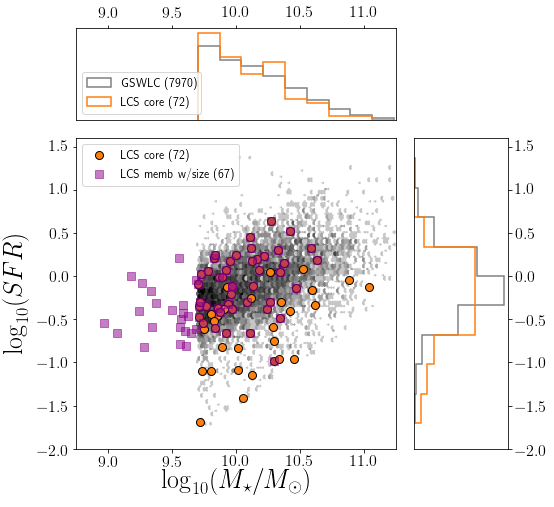

In [13]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

### LCS core vs GSWLC with B/T cut and mass match ###

number in lcs sample =  72
number in gsw sample =  7976
just checking ... 1440 72
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.272e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.21
p-vale = 3.907e-03 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

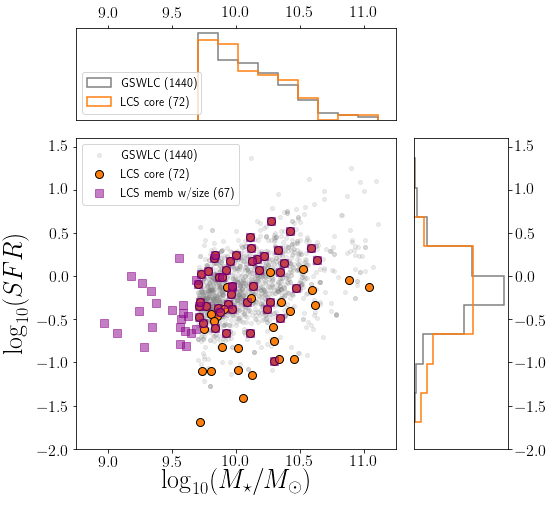

In [14]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False)

### SFR-M* :  LCS infall vs GSWLC - with BT cut ###

* SFRs are marginally different
* stellar masses are indistinguisable


number in lcs sample =  67
number in gsw sample =  7976
just checking ... 7970 67
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 3.605e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.10
p-vale = 4.391e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

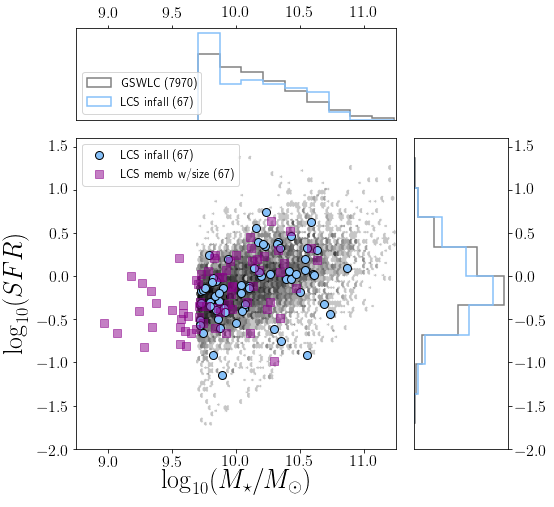

In [15]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',lcsmemb=True,outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)

### LCS infall vs GSWLC, with B/T and mass match ###

number in lcs sample =  67
number in gsw sample =  7976
just checking ... 1340 67
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.07
p-vale = 9.309e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.08
p-vale = 7.930e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

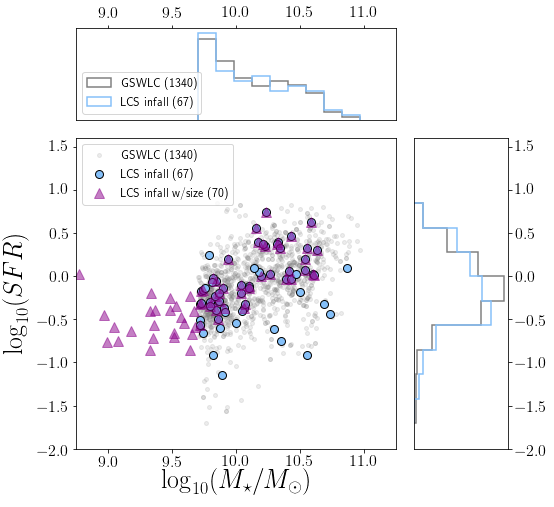

In [16]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',lcsinfall=True,outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=True)

### SFR - M*: LCS core vs infall, with B/T cut ###

* masses and SFRs are the same

number in core sample =  72
number in external sample =  67
just checking ... 72 67
9.702
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 8.045e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.16
p-vale = 2.668e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

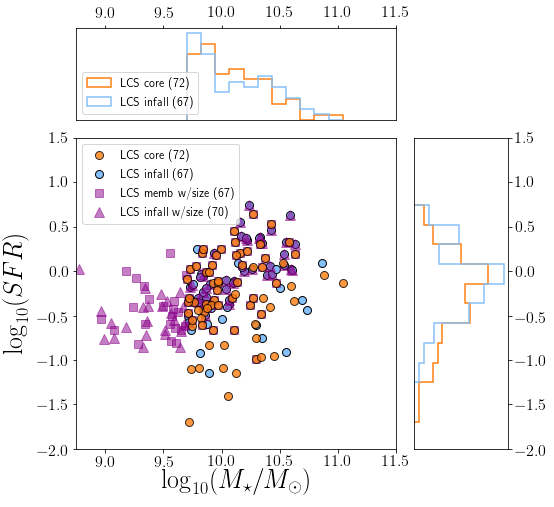

In [17]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=12)

# sSFR-Mstar: Compare LCS and GSWLC - no B/T cut #
# (updates from 7/1/2020) #

- limited by stellar mass, ssfr, and B/T < 0.3


### sSFR-M*: LCS core vs GSWLC Field, no BT cut ###

* sSFRs are different
* stellar masses are the same

number in core sample =  163
number in external sample =  12117
just checking ... 12114 163
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 6.863e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.30
p-vale = 3.509e-13 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

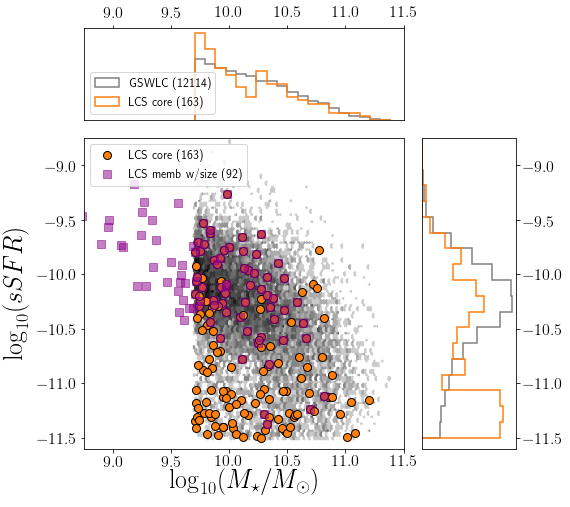

In [27]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False)

### sSFR-M*: LCS core vs GSWLC field, no BT cut, mass match ###

number in core sample =  163
number in external sample =  12117
galaxies in slice < # requested 5 20 11.206 0.0266
AFTER MASS MATCHING
number of gswlc =  3260
number of lcs =  163
just checking ... 3257 163
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 6.583e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.33
p-vale = 4.441e-15 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

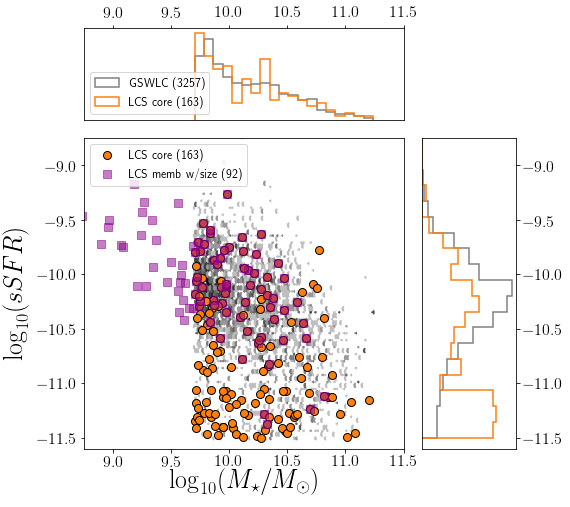

In [31]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True)

### sSFR-M*: LCS infall vs GSWLC Field, no BT cut ###

* sSFRs are different
* stellar masses are the same

number in core sample =  138
number in external sample =  12117
just checking ... 12114 138
9.701
9.707
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.07
p-vale = 4.560e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.20
p-vale = 5.376e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

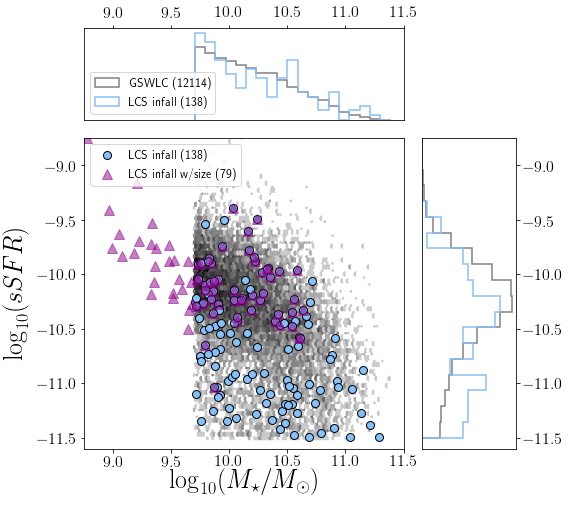

In [30]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=False)

### sSFR-M*: LCS core vs GSWLC field, no BT cut, mass match ###

number in core sample =  138
number in external sample =  12117
galaxies in slice < # requested 16 20 10.782 0.0208
galaxies in slice < # requested 2 20 11.21 0.0295
galaxies in slice < # requested 5 20 11.293 0.0332
galaxies in slice < # requested 3 20 11.041 0.021
galaxies in slice < # requested 0 20 10.931 0.0169
	ruh roh - doubling mass and redshift slices
galaxies in slice < # requested 5 20 10.939 0.0219
galaxies in slice < # requested 7 20 10.509 0.0153
AFTER MASS MATCHING
number of gswlc =  2760
number of lcs =  138
just checking ... 2760 138
9.701
9.707
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.04
p-vale = 9.745e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.20
p-vale = 5.220e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

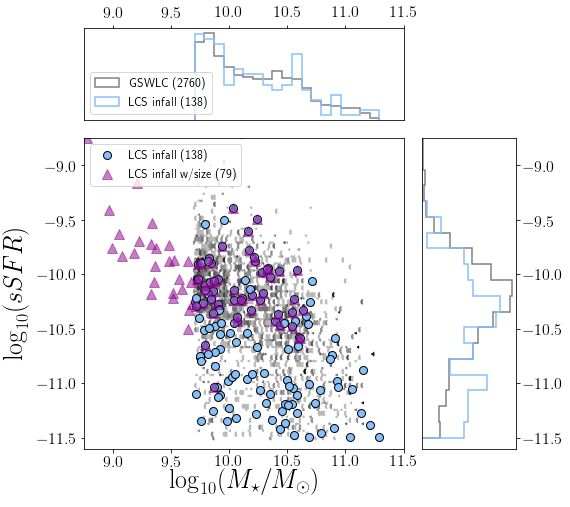

In [32]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=True)

### sSFR-M*: LCS Core vs infall, no BT cut ###

* sSFRs are not significantly different
* stellar masses are the same

number in core sample =  163
number in external sample =  138
just checking ... 163 138
9.702
9.707
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 4.052e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.17
p-vale = 2.397e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

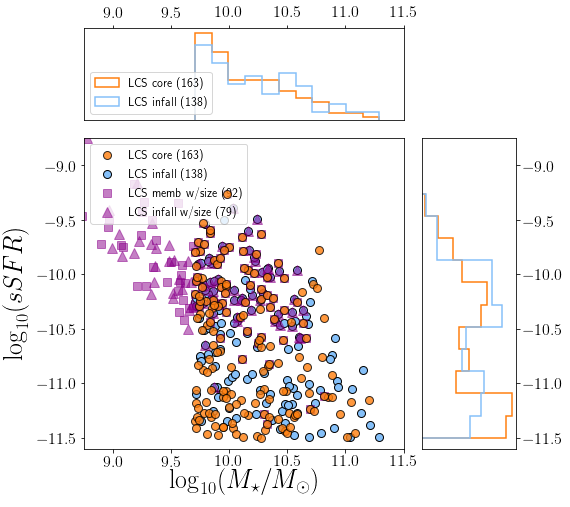

In [33]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar.png'
b.plot_ssfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=12)

# With B/T Cut #

### sSFR-M*: core vs GSWLC, with BT cut, no mass match ###

* sSFRs are different
* mstar is the same

number in core sample =  72
number in external sample =  7976
just checking ... 7975 72
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.09
p-vale = 5.513e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.19
p-vale = 9.130e-03 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

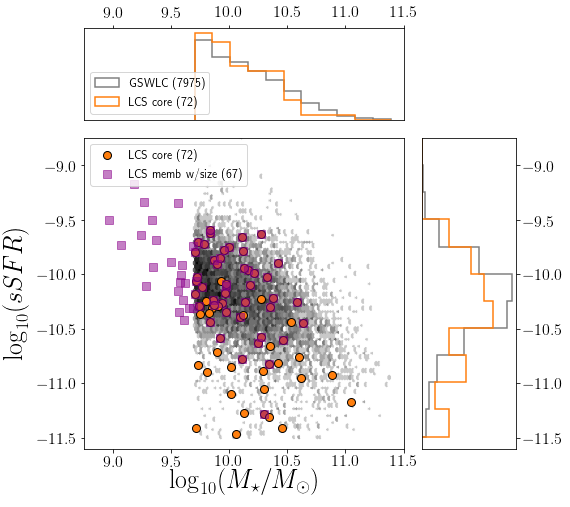

In [34]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,nbins=12,massmatch=False)

# With B/T Cut #

### sSFR-M*: core vs GSWLC, with BT cut, mass match ###


number in core sample =  72
number in external sample =  7976
AFTER MASS MATCHING
number of gswlc =  1440
number of lcs =  72
just checking ... 1440 72
9.702
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.379e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.22
p-vale = 2.464e-03 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

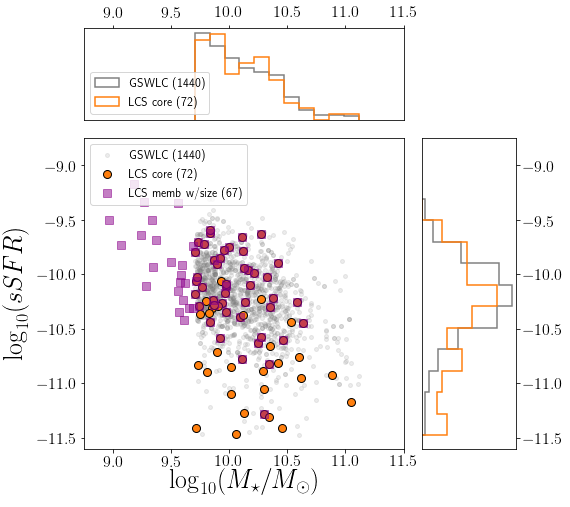

In [37]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,nbins=12,massmatch=True,hexbinflag=False)

### sSFR-M*: infall vs GSWLC with B/T cut, no mass match ###

* sSFRs are indistinguishable
* stellar masses are slightly different same




number in core sample =  67
number in external sample =  7976
just checking ... 7975 67
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 3.585e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.05
p-vale = 9.945e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

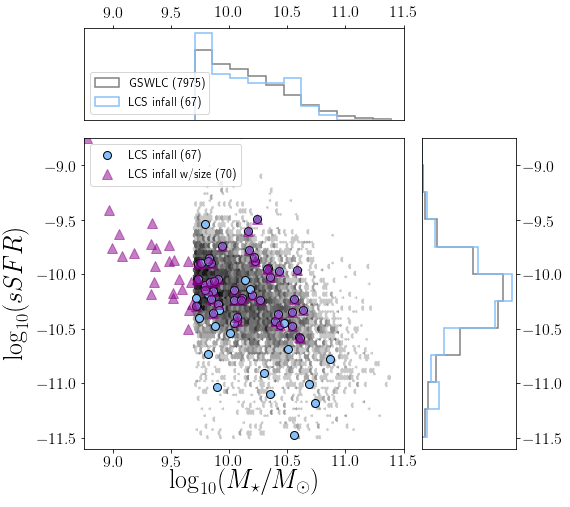

In [39]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,nbins=12,coreflag=False,massmatch=False)

# With B/T Cut #

### sSFR-M*: infall vs GSWLC, with BT cut, mass match ###


number in core sample =  67
number in external sample =  7976
AFTER MASS MATCHING
number of gswlc =  1340
number of lcs =  67
just checking ... 1340 67
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.467e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.05
p-vale = 9.984e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

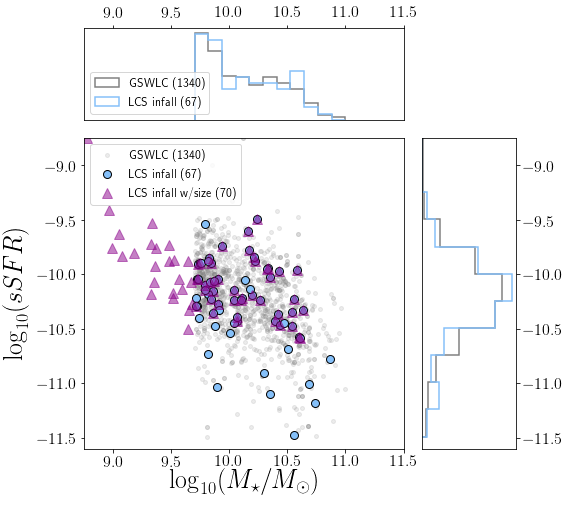

In [41]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,nbins=12,massmatch=True,coreflag=False,hexbinflag=False)

### sSR-M*: LCS core vs infall with B/T cut###

* sSFRs are not different
* stellar masses are slightly different

number in core sample =  72
number in external sample =  67
just checking ... 72 67
9.702
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 8.045e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.19
p-vale = 1.573e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

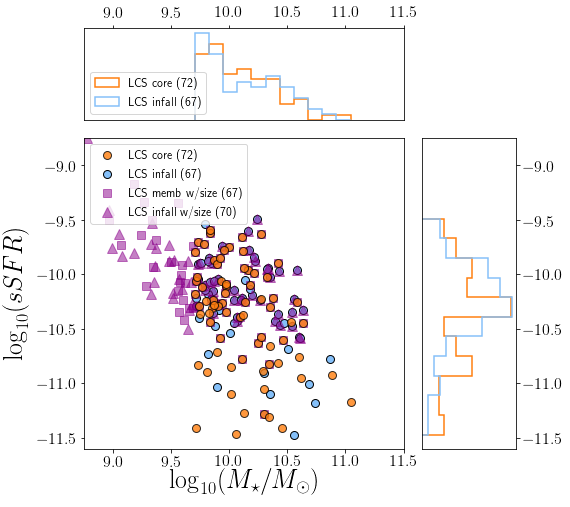

In [42]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
outfile1 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=12)

# Does sSFR correlate with size ratio #

* correlation is not super convincing, even if spearman rank says its 2.5 sigma

SpearmanrResult(correlation=0.18338266179153925, pvalue=0.010483468129402906)


<Figure size 489.6x360 with 0 Axes>

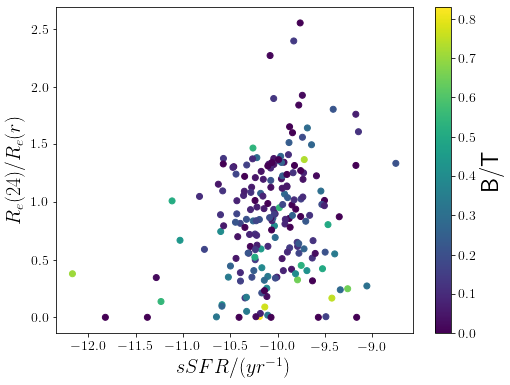

In [43]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcs-ssfr-size.pdf'
outfile2 = homedir+'/research/LCS/plots/lcs-ssfr-size.png'
lcs.plot_ssfr_sizeratio(outfile1=outfile1,outfile2=outfile2)

In [ ]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
outfile1 = homedir+'/research/LCS/plots/lcs-ssfr-size.pdf'
outfile2 = homedir+'/research/LCS/plots/lcs-ssfr-size.png'
lcs.plot_ssfr_sizeratio(outfile1=outfile1,outfile2=outfile2)